## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [7]:
df = pd.read_csv('housing_edit.csv')

#### Show Top 5 Records

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Preparing X and Y variables

In [10]:
X = df.drop(columns=['median_house_value'],axis=1)

In [11]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [12]:
y = df['median_house_value']

In [13]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

#### Creating Pipeline with Column Transformer

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Responsible for tranforming the data columns
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [16]:
X.shape

(20640, 13)

In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((16512, 13), (4128, 13))

#### Create an Evaluate Function to give all metrics after model Training

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 68437.4434
- Mean Absolute Error: 49584.7834
- R2 Score: 0.6496
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 70045.9478
- Mean Absolute Error: 50639.9414
- R2 Score: 0.6256




C:\Users\Vallee\Desktop\Stack\myDS_projects\houseprice_prediction\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.266e+12, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


Lasso
Model performance for Training set
- Root Mean Squared Error: 68433.9681
- Mean Absolute Error: 49595.2394
- R2 Score: 0.6497
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 70061.6521
- Mean Absolute Error: 50671.9444
- R2 Score: 0.6254


Ridge
Model performance for Training set
- Root Mean Squared Error: 68434.9959
- Mean Absolute Error: 49596.4010
- R2 Score: 0.6497
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 70067.3486
- Mean Absolute Error: 50677.1739
- R2 Score: 0.6254


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 49535.6827
- Mean Absolute Error: 33100.6987
- R2 Score: 0.8164
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 61350.9043
- Mean Absolute Error: 40797.6677
- R2 Score: 0.7128


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.000

### Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.839648
6,XGBRegressor,0.825758
5,Random Forest Regressor,0.818239
3,K-Neighbors Regressor,0.712767
4,Decision Tree,0.638681
0,Linear Regression,0.625580
1,Lasso,0.625412
2,Ridge,0.625351
8,AdaBoost Regressor,0.375237


## CatBoost Regression

In [23]:
cat_model = CatBoostRegressor(verbose=False)
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 83.96


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

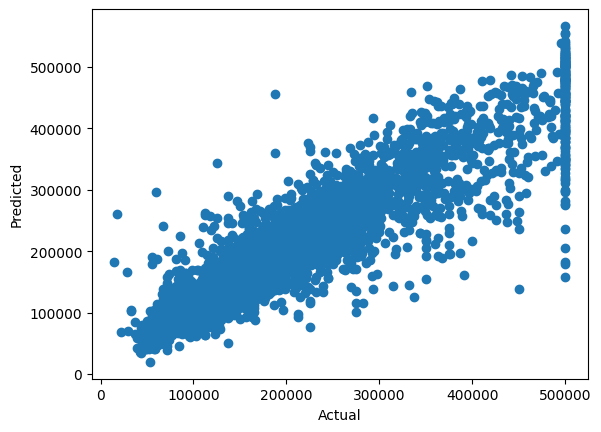

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

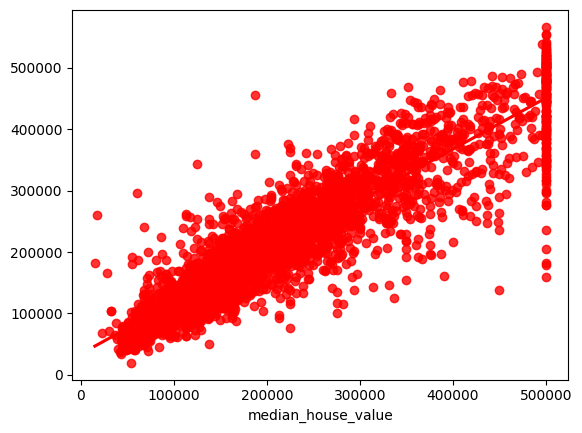

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [26]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
20046,47700,52781.044321,-5081.044321
3024,45800,71279.575217,-25479.575217
15663,500001,441532.862184,58468.137816
20484,218600,243013.713215,-24413.713215
9814,278000,281636.196727,-3636.196727
...,...,...,...
15362,263300,217943.886872,45356.113128
16623,266800,234183.754236,32616.245764
18086,500001,486071.207782,13929.792218
2144,72300,82813.007040,-10513.007040
